## 2. Feature extraction

### References:
1. https://github.com/ypwhs/dogs_vs_cats
2. https://www.kaggle.com/yangpeiwen/keras-inception-xception-0-47

### Import pkgs

In [1]:
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
# from keras.preprocessing import image
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D
# from keras import backend as K

# from keras.layers import Input
# from keras.layers.core import Lambda

# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg19 import VGG19
# from keras.applications.resnet50 import ResNet50
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.xception import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2


from keras.layers import *
from keras.models import *
from keras.applications import *
from keras.optimizers import *
from keras.regularizers import *
from keras.applications.inception_v3 import preprocess_input

### Load data

In [3]:
cwd = os.getcwd()
df = pd.read_csv(os.path.join(cwd, 'input', 'labels.csv'))
print('lables amount: %d' %len(df))
df.head()

lables amount: 10222


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
n = len(df)
breed = set(df['breed'])
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
num_to_class = dict(zip(range(n_class), breed))

In [5]:
width = 299
X = np.zeros((n, width, width, 3), dtype=np.uint8)
y = np.zeros((n, n_class), dtype=np.uint8)
for i in tqdm(range(n)):
    X[i] = cv2.resize(cv2.imread('.\\input\\train\\%s.jpg' % df['id'][i]), (width, width))
    y[i][class_to_num[df['breed'][i]]] = 1

100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [05:47<00:00, 29.43it/s]


### Preview images

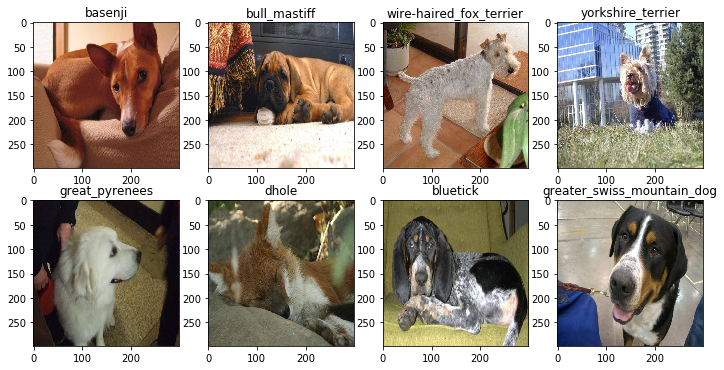

In [6]:
plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, n-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(X[random_index][:,:,::-1])
    plt.title(num_to_class[y[random_index].argmax()])
plt.show()

### Export feature

In [7]:
def get_features(MODEL, data=X):
    cnn_model = MODEL(include_top=False, input_shape=(width, width, 3), weights='imagenet')
    
    inputs = Input((width, width, 3))
    x = inputs
    x = Lambda(preprocess_input, name='preprocessing')(x)
    x = cnn_model(x)
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs, x)

    features = cnn_model.predict(data, batch_size=64, verbose=1)
    return features

In [8]:
inception_features = get_features(InceptionV3, X)
xception_features = get_features(Xception, X)
features = np.concatenate([inception_features, xception_features], axis=-1)

ResourceExhaustedError: OOM when allocating tensor with shape[64,149,149,32]
	 [[Node: inception_v3/conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](preprocessing/mul, conv2d_1/kernel/read)]]
	 [[Node: global_average_pooling2d_1/Mean/_1697 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_5940_global_average_pooling2d_1/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'inception_v3/conv2d_1/convolution', defined at:
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-93fde5b026fc>", line 1, in <module>
    inception_features = get_features(InceptionV3, X)
  File "<ipython-input-7-a39fca1b8042>", line 7, in get_features
    x = cnn_model(x)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\keras\engine\topology.py", line 602, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\keras\engine\topology.py", line 2058, in call
    output_tensors, _, _ = self.run_internal_graph(inputs, masks)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\keras\engine\topology.py", line 2209, in run_internal_graph
    output_tensors = _to_list(layer.call(computed_tensor, **kwargs))
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\keras\layers\convolutional.py", line 164, in call
    dilation_rate=self.dilation_rate)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\keras\backend\tensorflow_backend.py", line 3164, in conv2d
    data_format='NHWC')
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 672, in convolution
    op=op)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 338, in with_space_to_batch
    return op(input, num_spatial_dims, padding)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 664, in op
    name=name)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 131, in _non_atrous_convolution
    name=name)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 397, in conv2d
    data_format=data_format, name=name)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[64,149,149,32]
	 [[Node: inception_v3/conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](preprocessing/mul, conv2d_1/kernel/read)]]
	 [[Node: global_average_pooling2d_1/Mean/_1697 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_5940_global_average_pooling2d_1/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Train model

In [ ]:
inputs = Input(features.shape[1:])
x = inputs
x = Dropout(0.5)(x)
x = Dense(n_class, activation='softmax')(x)
model = Model(inputs, x)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
h = model.fit(features, y, batch_size=128, epochs=10, validation_split=0.1, verbose=2)

### Visualize model

In [ ]:
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Virtualize train curve

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')

### Load test data

In [ ]:
df2 = pd.read_csv('.\\input\\sample_submission.csv')
n_test = len(df2)
X_test = np.zeros((n_test, width, width, 3), dtype=np.uint8)
for i in tqdm(range(n_test)):
    X_test[i] = cv2.resize(cv2.imread('.\\input\\test\\%s.jpg' % df2['id'][i]), (width, width))

### Export test data feature

In [ ]:
inception_features = get_features(InceptionV3, X_test)
xception_features = get_features(Xception, X_test)
features_test = np.concatenate([inception_features, xception_features], axis=-1)

### Get test data prediction and output

In [ ]:
y_pred = model.predict(features_test, batch_size=128)
for b in breed:
    df2[b] = y_pred[:,class_to_num[b]]
df2.to_csv('.\\output\\pred.csv', index=None)

In [ ]:
print('Done !')